<a href="https://colab.research.google.com/github/anushka-kelkar/Datathon_Submission/blob/main/sleep_dataset_insights_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis,Reading and cleaning


In [ ]:
import pandas as pd

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/Sleep Dataset.xlsm - Sleep Dataset.csv')


In [ ]:


print(ds.describe())
print(ds.info())
print(ds.head())


        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check for Null Values


In [ ]:
#print null values
print(ds[ds.isnull().any(axis=1)])

#count null values
print(ds.isnull().sum())


     Person ID  Gender  Age         Occupation  Sleep Duration  \
0            1    Male   27  Software Engineer             6.1   
1            2    Male   28             Doctor             6.2   
2            3    Male   28             Doctor             6.2   
7            8    Male   29             Doctor             7.8   
8            9    Male   29             Doctor             7.8   
..         ...     ...  ...                ...             ...   
341        342  Female   56             Doctor             8.2   
342        343  Female   56             Doctor             8.2   
343        344  Female   57              Nurse             8.1   
358        359  Female   59              Nurse             8.0   
359        360  Female   59              Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
0                   6                       42             6     Overweight   
1                   6                       60   

In [ ]:
print(ds.isnull().sum().sum())


219


In [ ]:
# Fill NaN values in the 'Disorder' column with 'No disorder'
ds['Sleep Disorder'] = ds['Sleep Disorder'].fillna('No disorder')
# prompt: Now replace normal weight with  normal everywhere in the dataset and print distinct values

# Replace 'Normal weight' with 'Normal' in the 'BMI Category' column
ds['BMI Category'] = ds['BMI Category'].replace('Normal Weight', 'Normal')

# Print distinct values in the 'BMI Category' column
print(ds['BMI Category'].unique())


['Overweight' 'Normal' 'Obese']


Grouped into Heart Rate contributing to sleep disorder and not contributing and removing outliers which dont contribute to sleep disorder


In [ ]:
# Group data by 'Sleep Disorder'
grouped = ds.groupby('Sleep Disorder')

# Calculate the mean heart rate for individuals with 'No disorder'
mean_heart_rate_no_disorder = grouped['Heart Rate'].get_group('No disorder').mean()

# Iterate through each disorder group
for disorder, group_data in grouped:
    if disorder != 'No disorder':
        # Identify outliers in heart rate for the current disorder
        Q1 = group_data['Heart Rate'].quantile(0.25)
        Q3 = group_data['Heart Rate'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the mean heart rate of 'No disorder' group
        outliers = group_data[(group_data['Heart Rate'] < lower_bound) | (group_data['Heart Rate'] > upper_bound)].index
        ds.loc[outliers, 'Heart Rate'] = mean_heart_rate_no_disorder


<ipython-input-179-6b02b0a50fd4>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.01826484018265' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ds.loc[outliers, 'Heart Rate'] = mean_heart_rate_no_disorder


In [ ]:
print(ds.isnull().sum().sum())


0


Outliers in 'Age':
Series([], Name: Age, dtype: int64)



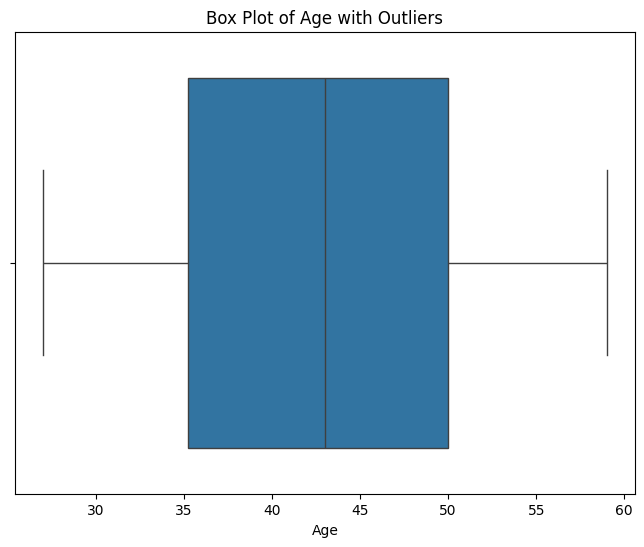

Outliers in 'Sleep Duration':
Series([], Name: Sleep Duration, dtype: float64)



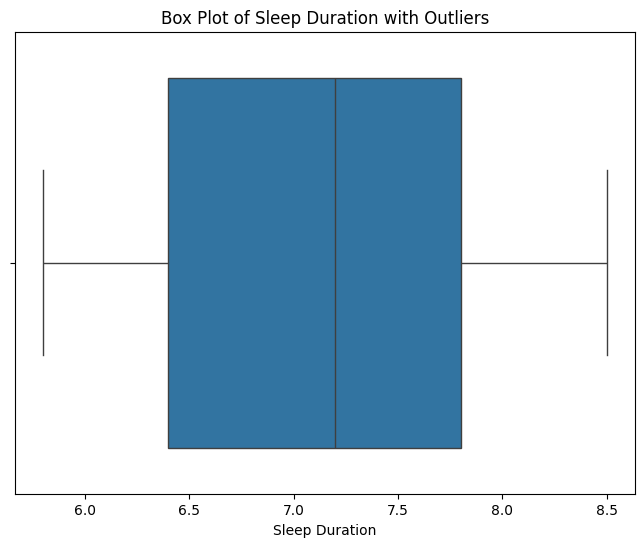

Outliers in 'Quality of Sleep':
Series([], Name: Quality of Sleep, dtype: int64)



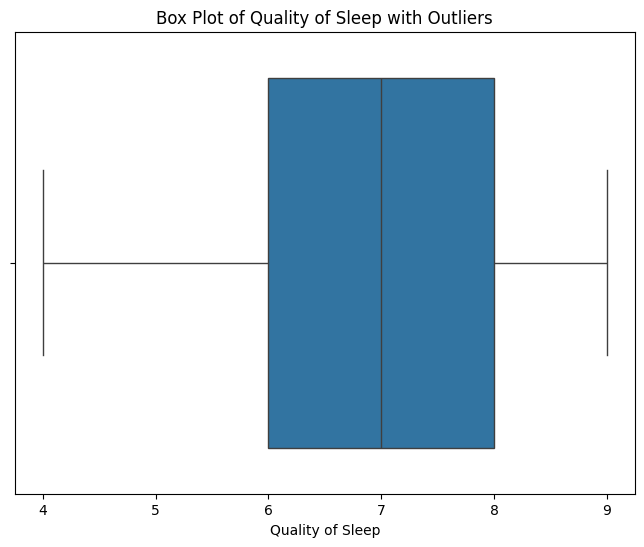

Outliers in 'Physical Activity Level':
Series([], Name: Physical Activity Level, dtype: int64)



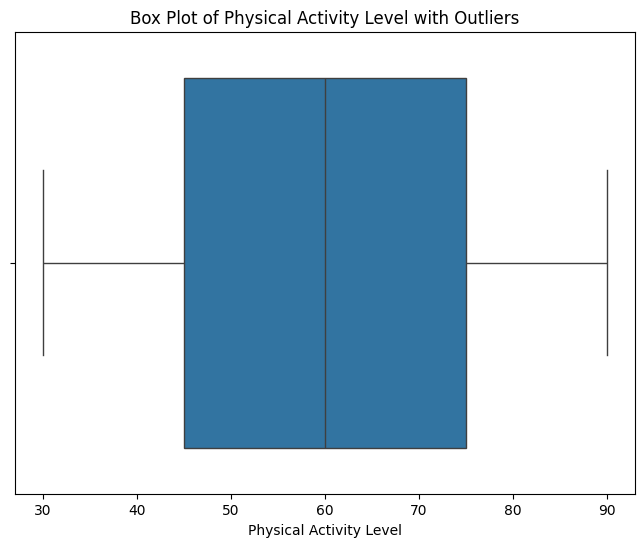

Outliers in 'Stress Level':
Series([], Name: Stress Level, dtype: int64)



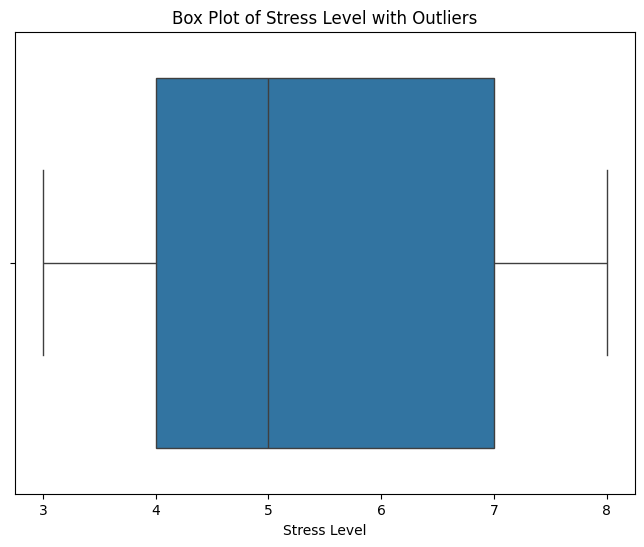

Outliers in 'Heart Rate':
3      85.0
4      85.0
6      82.0
16     80.0
18     80.0
80     81.0
81     81.0
93     84.0
145    84.0
147    80.0
Name: Heart Rate, dtype: float64



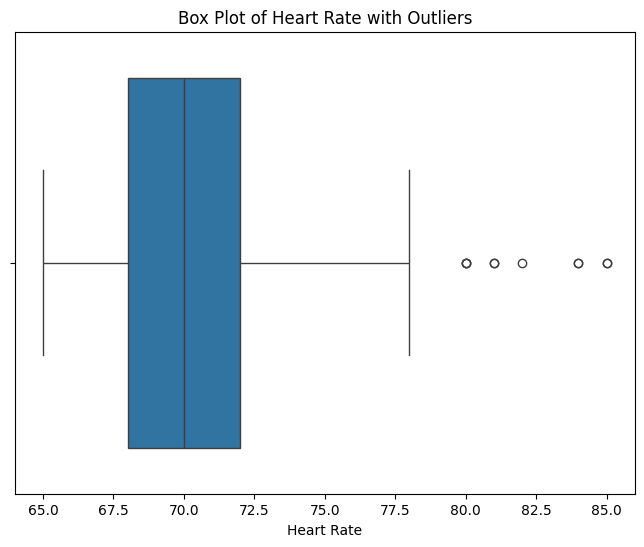

Outliers in 'Daily Steps':
Series([], Name: Daily Steps, dtype: int64)



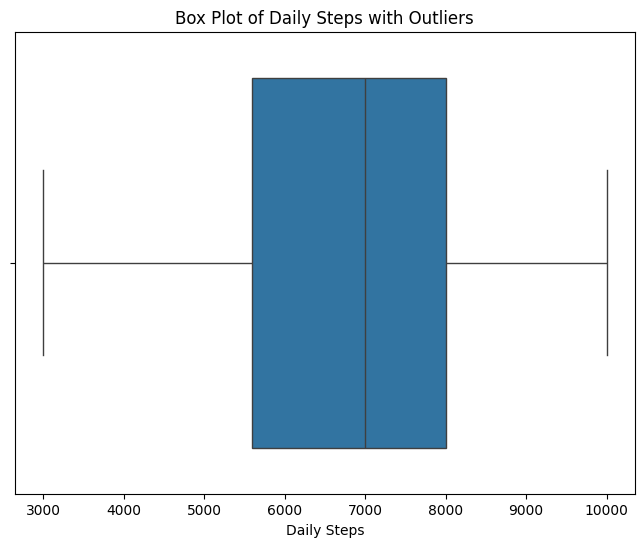

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ds' DataFrame is already loaded as in the previous code

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Iterate through numerical columns and identify/plot outliers
for col in ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']:
    outliers = find_outliers_iqr(ds[col])

    print(f"Outliers in '{col}':\n{outliers}\n")

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=ds[col])
    plt.title(f'Box Plot of {col} with Outliers')
    plt.xlabel(col)
    plt.show()


Insights -No outliers in Age,Sleep Duration,Quality of sleep ,Physical Activity,Stress level,BMI..Outliers are only found in Heart Rate.Which are important to know the sleep disorder further



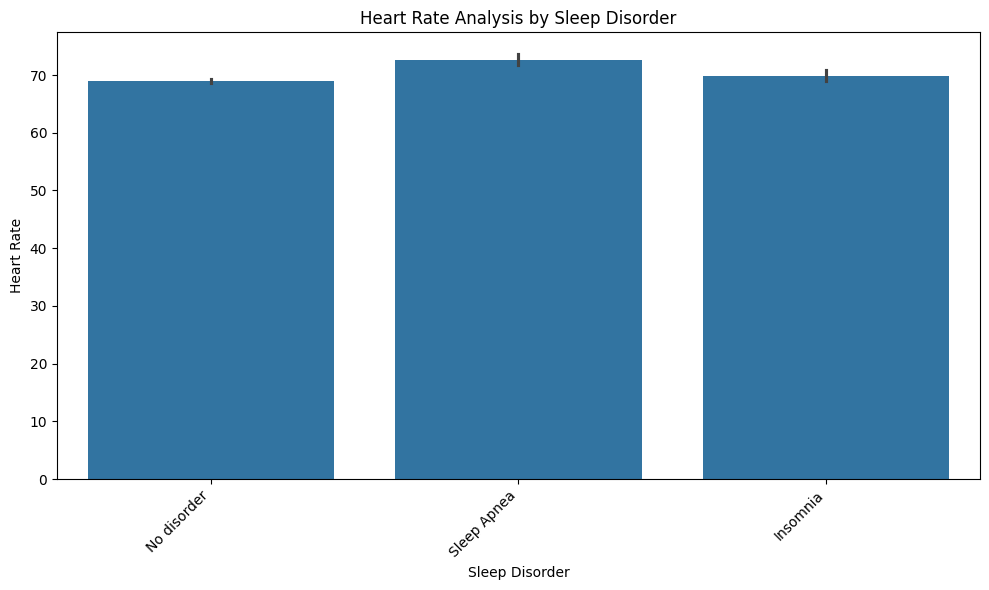

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Heart Rate', data=ds)
plt.title('Heart Rate Analysis by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


All Sleep Disorders have almost Same heart rate number and Sleep Duration so matters a bit


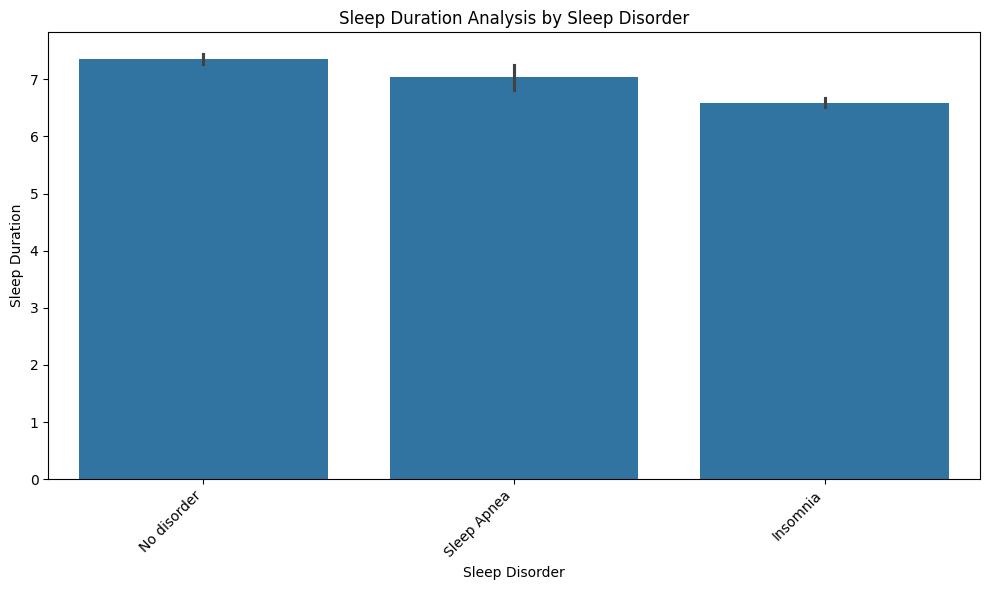

In [ ]:



plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Sleep Duration', data=ds)
plt.title('Sleep Duration Analysis by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As Age increases Sleep Duration Also increases as they have more time


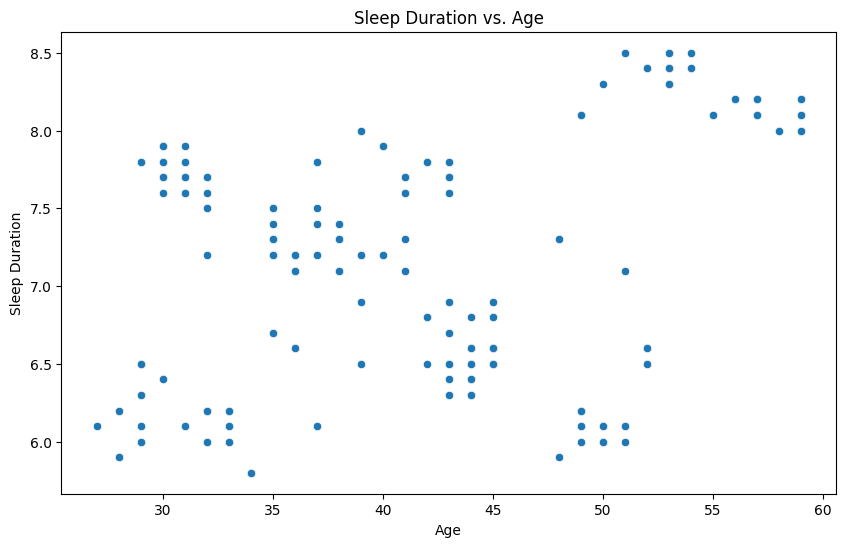

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=ds)
plt.title('Sleep Duration vs. Age')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()


It is seen that many people dont have any Disorder

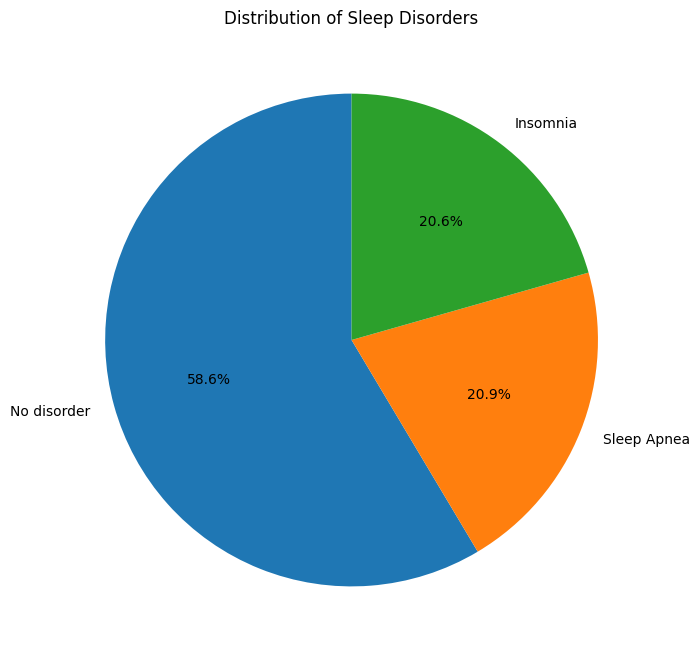

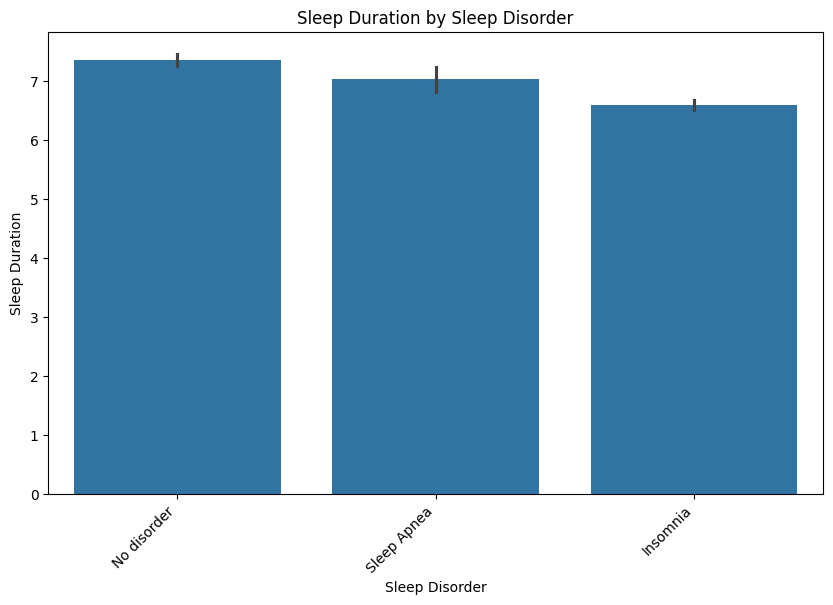

In [ ]:


# Filter data for 'Sleep apnea' and 'No disorder' for the pie chart
sleep_apnea_data = ds[ds['Sleep Disorder'] == 'Sleep Apnea']
no_disorder_data = ds[ds['Sleep Disorder'] == 'No disorder']

# Create the pie chart
disorder_counts = ds['Sleep Disorder'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disorder_counts, labels=disorder_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sleep Disorders')
plt.show()

# Create the column chart for sleep duration
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Sleep Duration', data=ds)
plt.title('Sleep Duration by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45, ha='right')
plt.show()


Sleep Duration is Mainly Distributed Evenly in 6 and 8 Hours for sleep Apnea Users


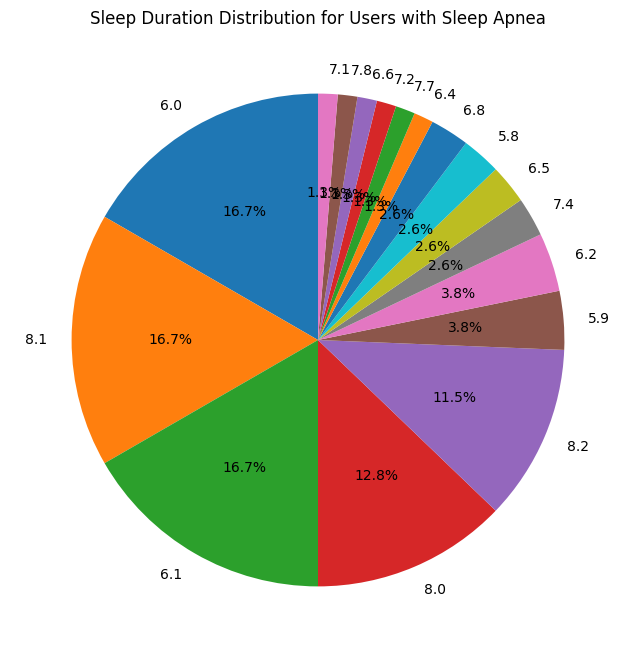

In [ ]:
# Filter data for users with sleep apnea
sleep_apnea_users = ds[ds['Sleep Disorder'] == 'Sleep Apnea']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sleep_apnea_users['Sleep Duration'].value_counts(), labels=sleep_apnea_users['Sleep Duration'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Sleep Duration Distribution for Users with Sleep Apnea')
plt.show()


OverWeight Category Has more Sleep Apnea


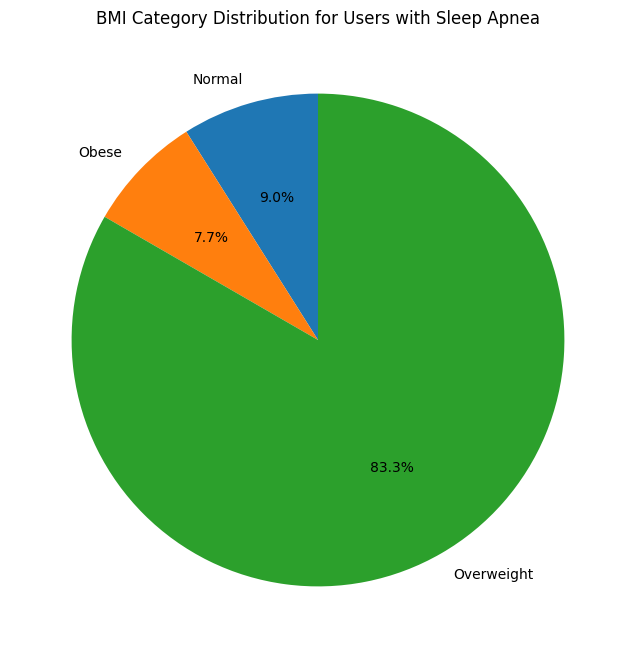

In [ ]:

# Filter data for users with sleep apnea
sleep_apnea_users = ds[ds['Sleep Disorder'] == 'Sleep Apnea']

# Assuming 'BMI Category' is a column in your dataset
# If not, you might need to calculate or create it based on BMI values
# For example:
# ds['BMI Category'] = pd.cut(ds['BMI'], bins=[0, 18.5, 25, 30, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Group users with sleep apnea by BMI category
bmi_groups = sleep_apnea_users.groupby('BMI Category')['BMI Category'].count()


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bmi_groups, labels=bmi_groups.index, autopct='%1.1f%%', startangle=90)
plt.title('BMI Category Distribution for Users with Sleep Apnea')
plt.show()


OverWeight category has more Insomnia

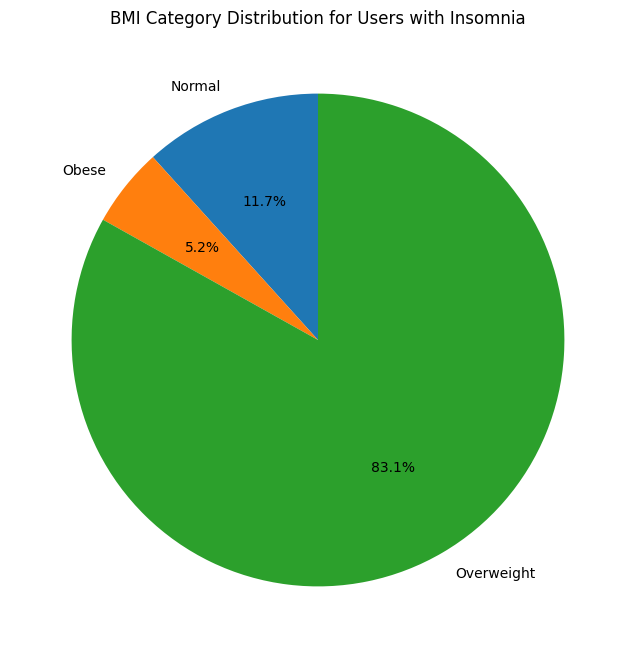

In [ ]:


# Filter data for users with insomnia (assuming 'Insomnia' is a value in 'Sleep Disorder' column)
insomnia_users = ds[ds['Sleep Disorder'] == 'Insomnia']

# Group users with insomnia by BMI category
bmi_groups = insomnia_users.groupby('BMI Category')['BMI Category'].count()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bmi_groups, labels=bmi_groups.index, autopct='%1.1f%%', startangle=90)
plt.title('BMI Category Distribution for Users with Insomnia')
plt.show()


Sleep Quality Is evenly distributed in 6-7 hours Sleep Quality not much affecting

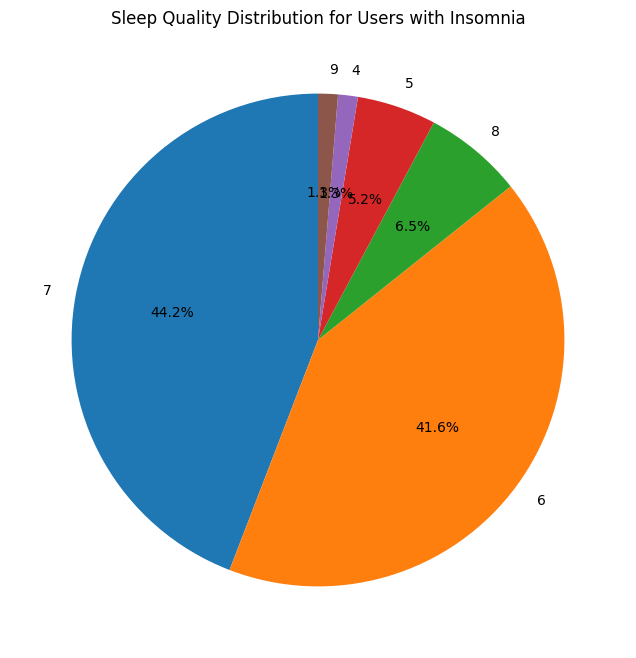

In [ ]:

# Filter data for users with insomnia
insomnia_users = ds[ds['Sleep Disorder'] == 'Insomnia']

# Create the pie chart for sleep quality
plt.figure(figsize=(8, 8))
plt.pie(insomnia_users['Quality of Sleep'].value_counts(), labels=insomnia_users['Quality of Sleep'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Sleep Quality Distribution for Users with Insomnia')
plt.show()


Physical Activity of Insomnia Users is high

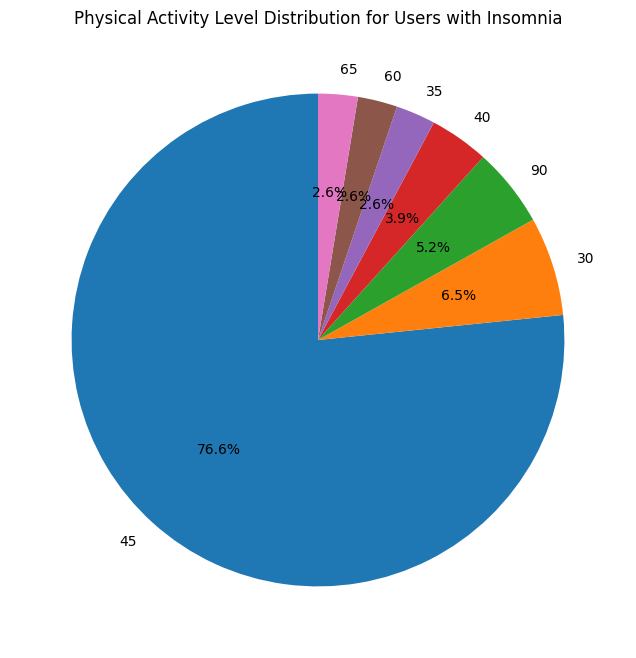

In [ ]:

# Filter data for users with insomnia
insomnia_users = ds[ds['Sleep Disorder'] == 'Insomnia']

# Create the pie chart for physical activity level
plt.figure(figsize=(8, 8))
plt.pie(insomnia_users['Physical Activity Level'].value_counts(),
        labels=insomnia_users['Physical Activity Level'].value_counts().index,
        autopct='%1.1f%%', startangle=90)
plt.title('Physical Activity Level Distribution for Users with Insomnia')
plt.show()


Sleep Disorders Among Females seen that all disorders are seen in almost even proportion

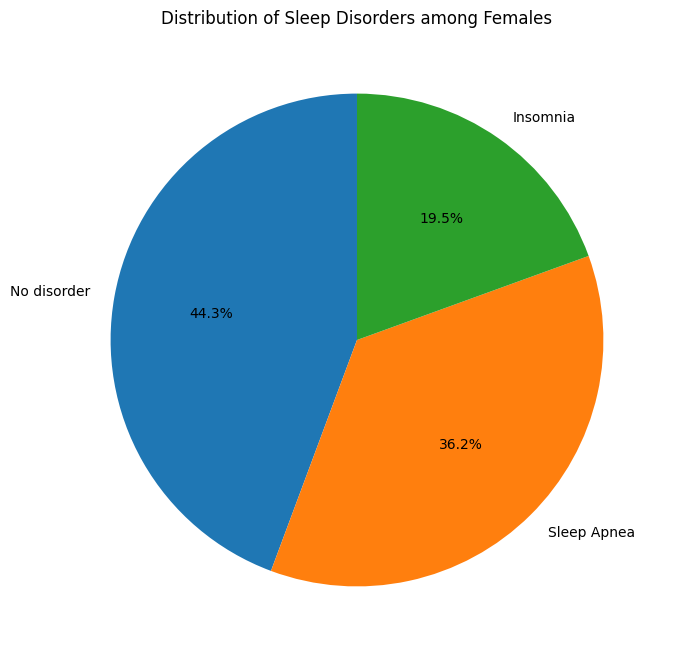

In [ ]:


import matplotlib.pyplot as plt
# Filter data for females
female_data = ds[ds['Gender'] == 'Female']

# Count occurrences of each sleep disorder for females
sleep_disorder_counts_female = female_data['Sleep Disorder'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sleep_disorder_counts_female, labels=sleep_disorder_counts_female.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sleep Disorders among Females')
plt.show()


Sleep Disorders Among Males no disorder is large

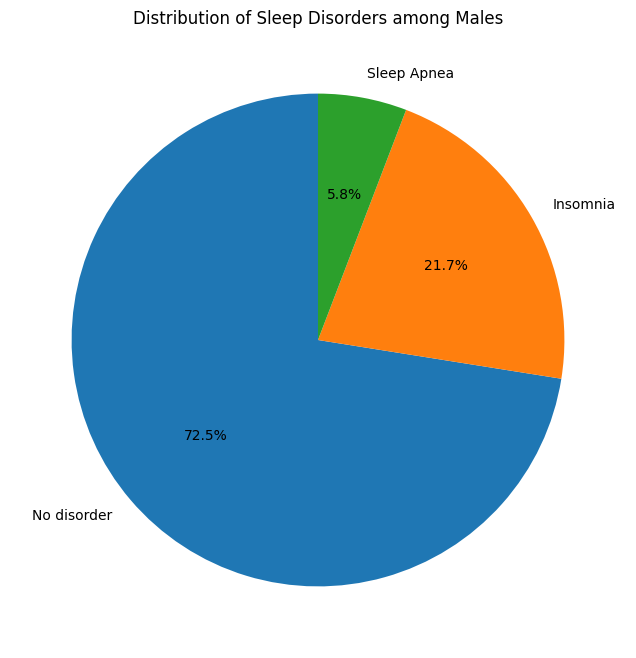

In [ ]:
# Filter data for males
male_data = ds[ds['Gender'] == 'Male']

# Count occurrences of each sleep disorder for males
sleep_disorder_counts_male = male_data['Sleep Disorder'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sleep_disorder_counts_male, labels=sleep_disorder_counts_male.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sleep Disorders among Males')
plt.show()


Quality of Sleep is high in Females than males

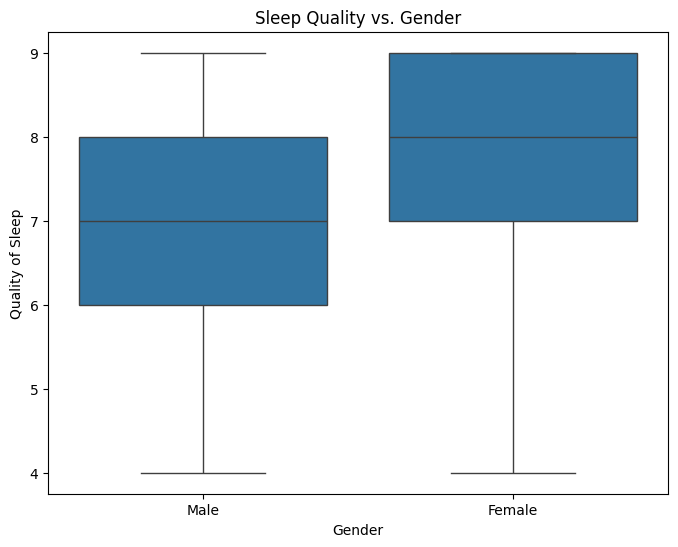

In [ ]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Quality of Sleep', data=ds)
plt.title('Sleep Quality vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep')
plt.show()


It is seen that most of the females are overweight than males are normal weight


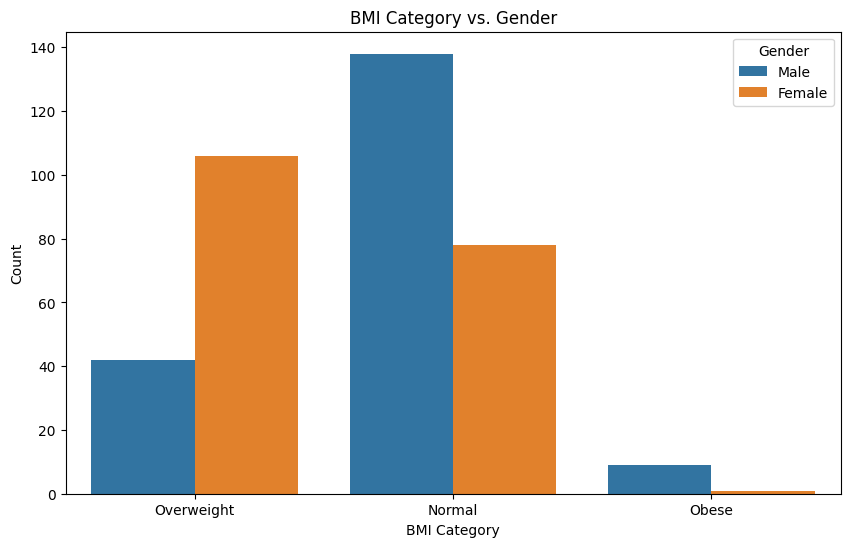

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='BMI Category', hue='Gender', data=ds)
plt.title('BMI Category vs. Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


Sleep Duration is more in females

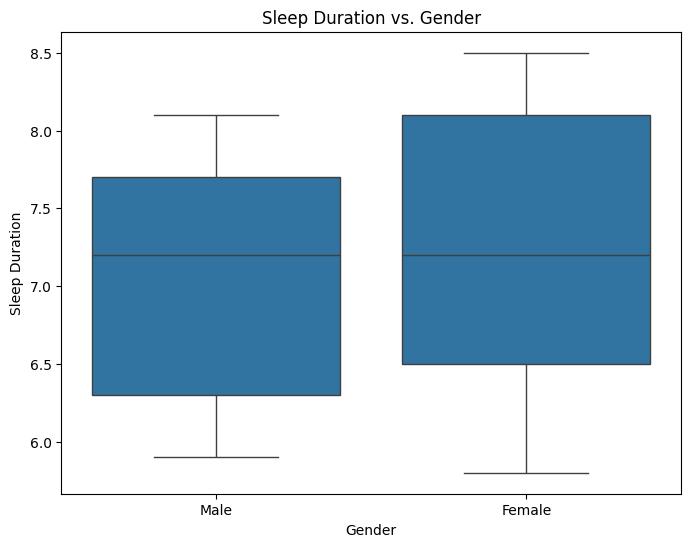

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=ds)
plt.title('Sleep Duration vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()


Sleep Apnea among People with Age above 49

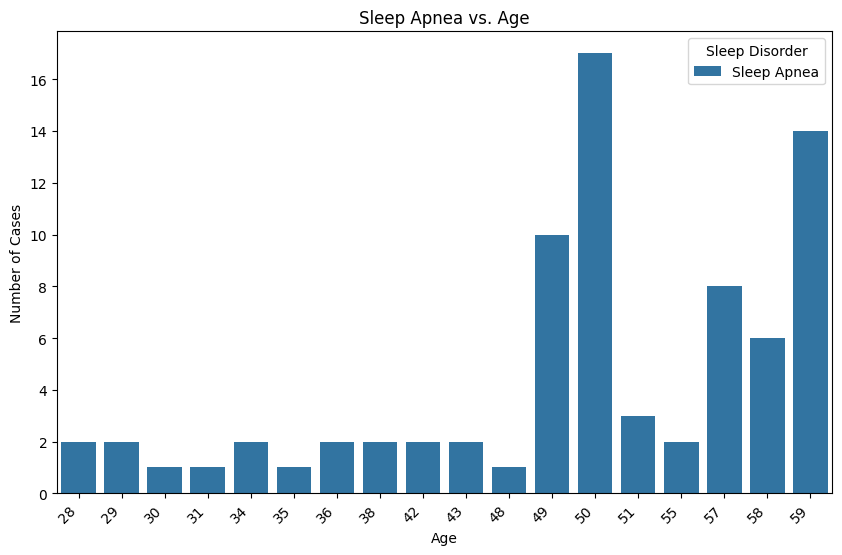

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Sleep Disorder', data=ds[ds['Sleep Disorder'] == 'Sleep Apnea'])
plt.title('Sleep Apnea vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()



  Insomnia among People with Age above 40








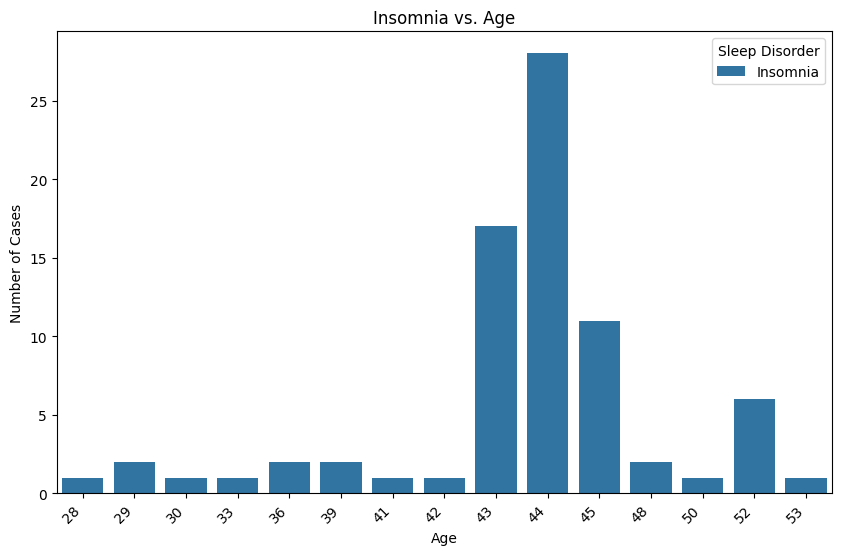

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Sleep Disorder', data=ds[ds['Sleep Disorder'] == 'Insomnia'])
plt.title('Insomnia vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()


No Data Of 50+ age males

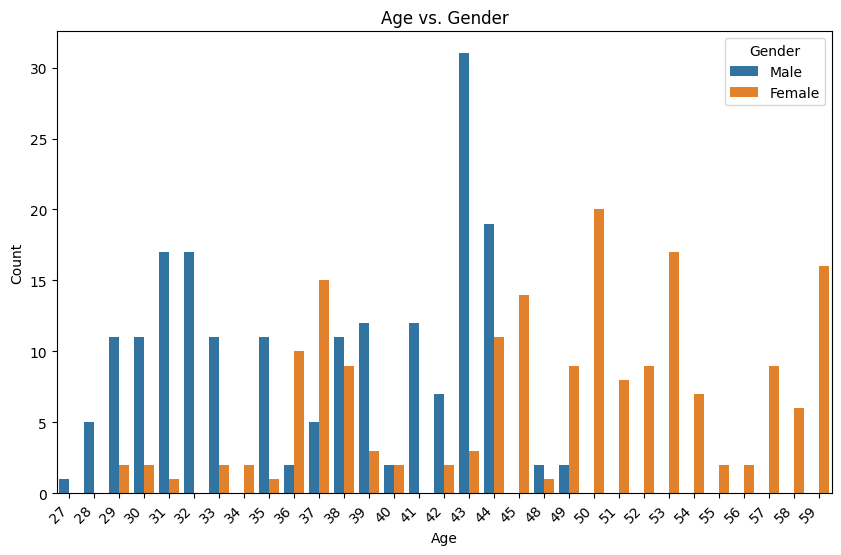

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Gender', data=ds)
plt.title('Age vs. Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Assuming 'ds' DataFrame is already loaded as in the previous code

# Find distinct values in 'Occupation'
distinct_occupations = ds['Occupation'].unique()
print("Distinct Occupations:\n", distinct_occupations)

# Find distinct values in 'BMI'
distinct_bmi_values = ds['BMI Category'].unique()
print("\nDistinct BMI Values:\n", distinct_bmi_values)


Distinct Occupations:
 ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Distinct BMI Values:
 ['Overweight' 'Normal' 'Obese']


As Age Inceases heart rate Decreases

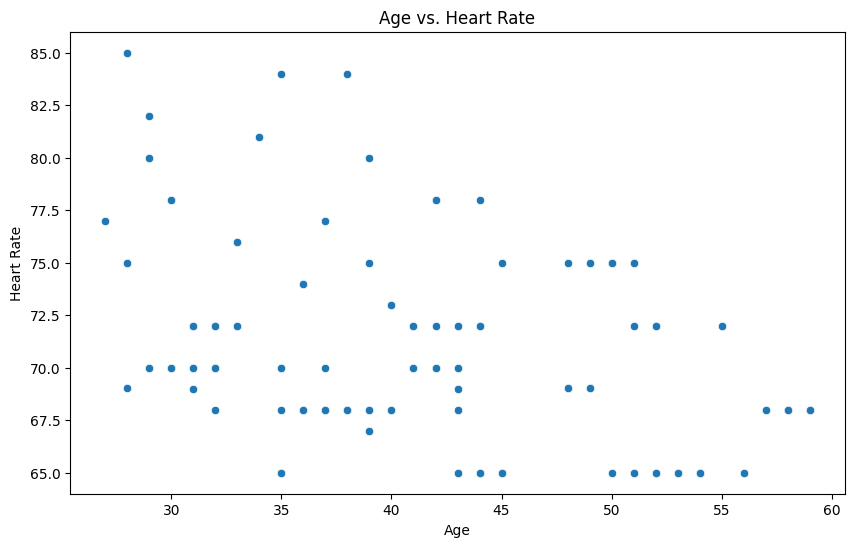

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Heart Rate', data=ds)
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()


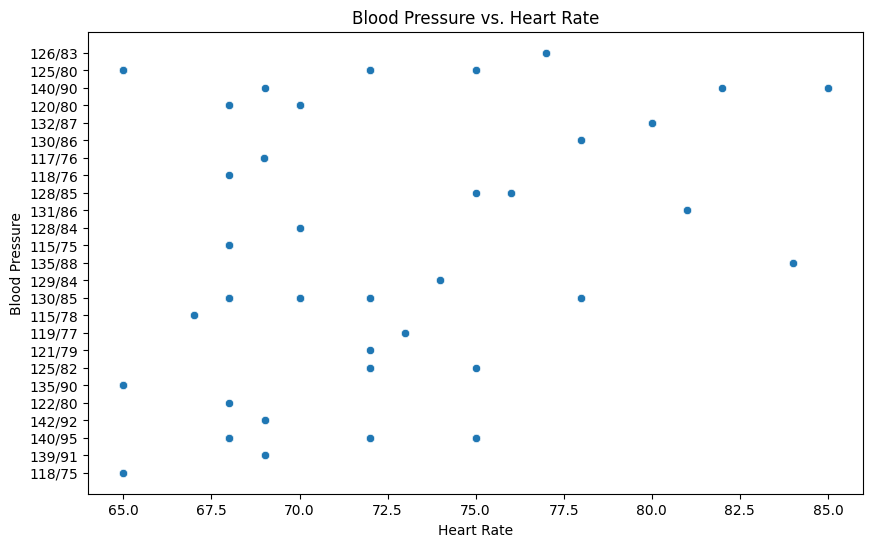

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Blood Pressure', data=ds) # Assuming 'Blood Pressure' is a column in your dataset
plt.title('Blood Pressure vs. Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Blood Pressure')
plt.show()


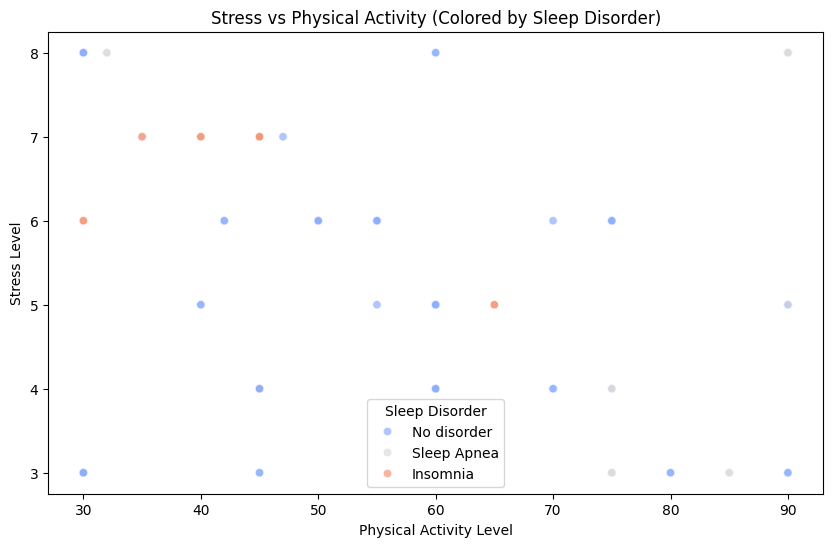

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x="Physical Activity Level", y="Stress Level", hue="Sleep Disorder", palette="coolwarm", alpha=0.7)
plt.xlabel("Physical Activity Level")
plt.ylabel("Stress Level")
plt.title("Stress vs Physical Activity (Colored by Sleep Disorder)")
plt.legend(title="Sleep Disorder")
plt.show()


In [ ]:


from google.colab import files
ds.to_csv('ds.csv')
files.download('ds.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Encoding

In [ ]:

encoding_maps = {
    'Gender': {'Male': 1, 'Female': 2},
    'Occupation': {occ: i+1 for i, occ in enumerate(ds['Occupation'].unique())},
    'BMI Category': {bmi: i+1 for i, bmi in enumerate(ds['BMI Category'].unique())},
    'Sleep Disorder': {disorder: i+1 for i, disorder in enumerate(ds['Sleep Disorder'].unique())}
}

# Apply encoding
for col, mapping in encoding_maps.items():
    ds[col] = ds[col].map(mapping)

# Save the encoded dataset
ds.to_csv("encoded_dataset.csv", index=False)

# Display first few rows of the encoded dataset
print(ds.head())

   Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0          1       1   27           1             6.1                 6   
1          2       1   28           2             6.2                 6   
2          3       1   28           2             6.2                 6   
3          4       1   28           3             5.9                 4   
4          5       1   28           3             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category Blood Pressure  \
0                       42             6             1         126/83   
1                       60             8             2         125/80   
2                       60             8             2         125/80   
3                       30             8             3         140/90   
4                       30             8             3         140/90   

   Heart Rate  Daily Steps  Sleep Disorder  
0        77.0         4200               1  
1        75.0       

In [ ]:
def categorize_bp(bp):
    try:
        systolic, diastolic = map(int, bp.split('/'))
        if systolic <= 90 and diastolic <= 60:
            return 'Low'
        elif systolic <= 120 and diastolic <= 80:
            return 'Normal'
        else:
            return 'High'
    except:
        return 'Unknown'  # Handle missing or invalid data

# Apply categorization
ds['Blood Pressure'] = ds['Blood Pressure'].apply(categorize_bp)

# Encoding Blood Pressure (1-Based Indexing)
bp_encoding = {'Low': 1, 'Normal': 2, 'High': 3}
ds['Blood Pressure'] = ds['Blood Pressure'].map(bp_encoding)

# Save the modified dataset
ds.to_csv("categorized_bp_dataset.csv", index=False)

# Display first few rows
print(ds.head())

   Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0          1       1   27           1             6.1                 6   
1          2       1   28           2             6.2                 6   
2          3       1   28           2             6.2                 6   
3          4       1   28           3             5.9                 4   
4          5       1   28           3             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             1               3   
1                       60             8             2               3   
2                       60             8             2               3   
3                       30             8             3               3   
4                       30             8             3               3   

   Heart Rate  Daily Steps  Sleep Disorder  
0        77.0         4200               1  
1        75.0 

Print Skewness

In [ ]:


print(ds.skew())


Person ID                  0.000000
Gender                     0.021478
Age                        0.257222
Occupation                 0.138964
Sleep Duration             0.037554
Quality of Sleep          -0.207448
Physical Activity Level    0.074487
Stress Level               0.154330
BMI Category              -0.011894
Blood Pressure            -1.288704
Heart Rate                 1.002593
Daily Steps                0.178277
Sleep Disorder             0.794979
dtype: float64


Skewness of Heart rate and Blood pressure is more

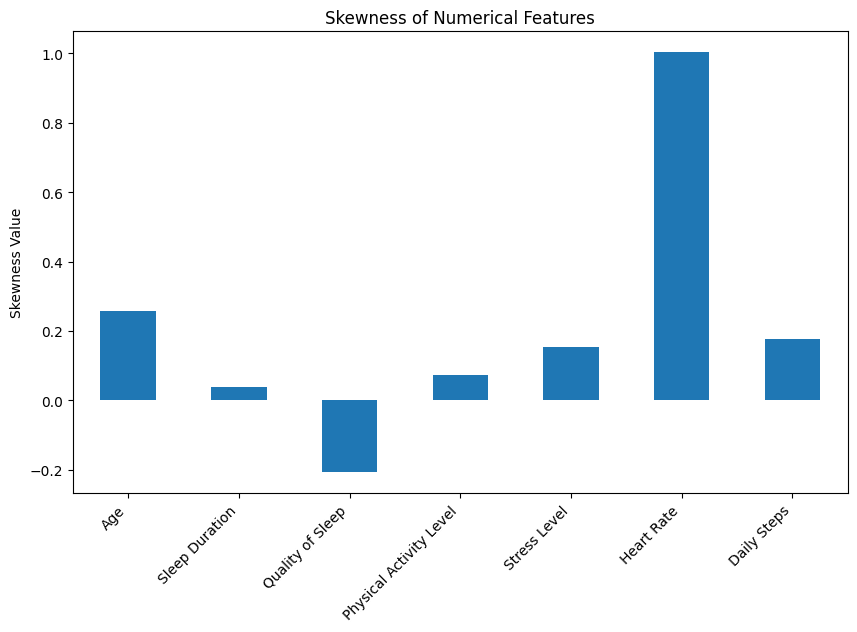

In [ ]:


import matplotlib.pyplot as plt
# Assuming 'ds' DataFrame is already loaded and processed as in your previous code

# Calculate skewness for relevant numerical columns
skewness_values = ds[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].skew()

# Plotting skewness
plt.figure(figsize=(10, 6))
skewness_values.plot(kind='bar')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness Value')
plt.xticks(rotation=45, ha='right')
plt.show()


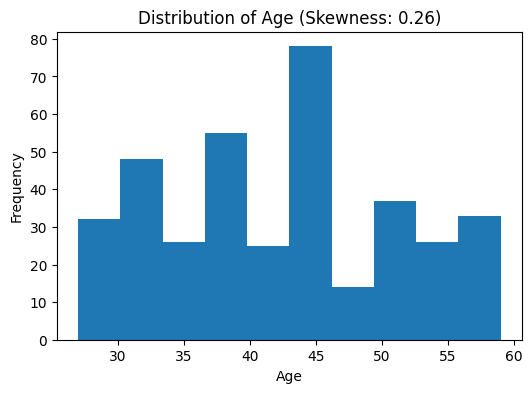

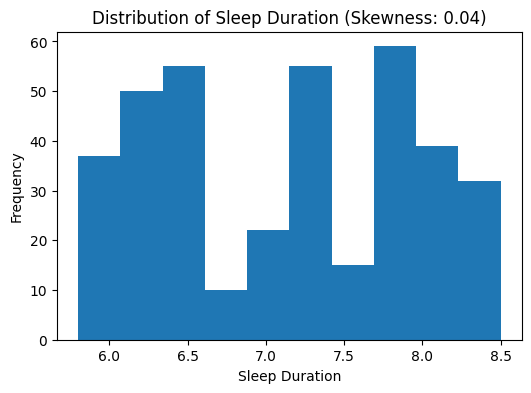

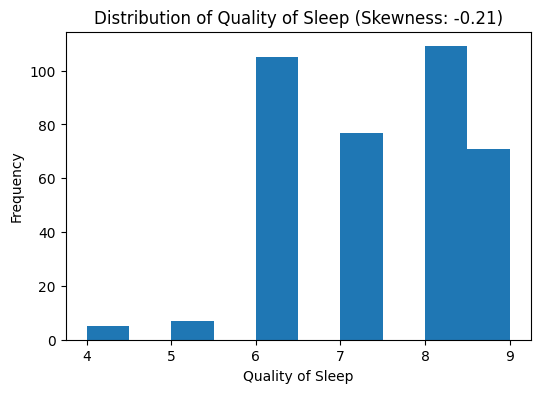

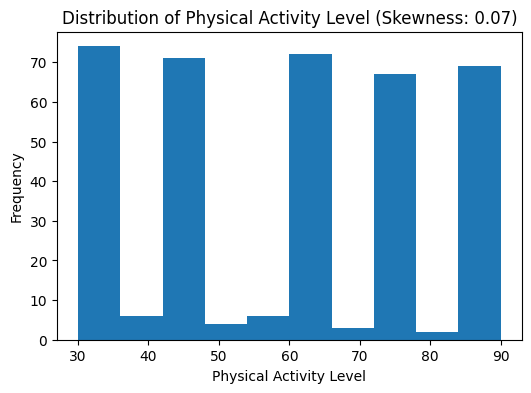

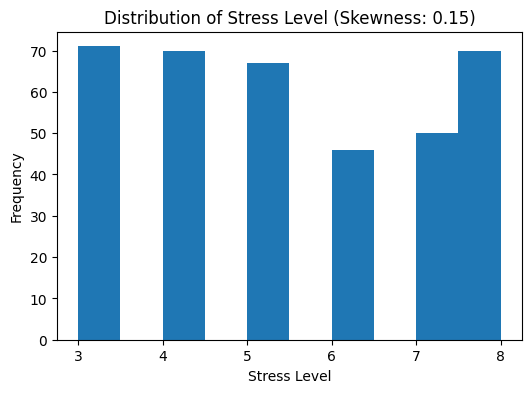

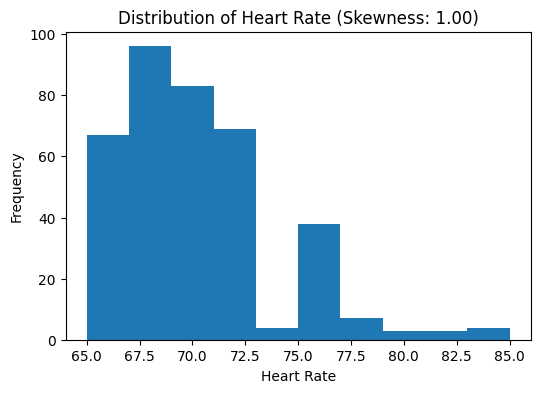

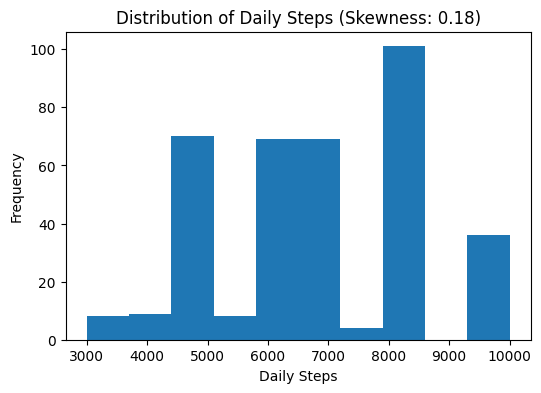

In [ ]:
# prompt: plot graphs for individual skewnesses

import matplotlib.pyplot as plt
# Assuming 'ds' DataFrame and skewness_values are already calculated as in your previous code

# Plotting individual skewness for each feature
for feature in skewness_values.index:
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    plt.hist(ds[feature], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Distribution of {feature} (Skewness: {skewness_values[feature]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
ds.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,1.494652,42.184492,5.614973,7.132086,7.312834,59.171123,5.385027,1.631016,2.770053,69.957463,6816.844920,1.620321
std,108.108742,0.500641,8.673133,2.560033,0.795657,1.196956,20.830804,1.774526,0.535797,0.421362,3.776299,1617.915679,0.805620
min,1.000000,1.000000,27.000000,1.000000,5.800000,4.000000,30.000000,3.000000,1.000000,2.000000,65.000000,3000.000000,1.000000
25%,94.250000,1.000000,35.250000,4.000000,6.400000,6.000000,45.000000,4.000000,1.000000,3.000000,68.000000,5600.000000,1.000000
50%,187.500000,1.000000,43.000000,5.000000,7.200000,7.000000,60.000000,5.000000,2.000000,3.000000,70.000000,7000.000000,1.000000
75%,280.750000,2.000000,50.000000,7.000000,7.800000,8.000000,75.000000,7.000000,2.000000,3.000000,72.000000,8000.000000,2.000000
max,374.000000,2.000000,59.000000,11.000000,8.500000,9.000000,90.000000,8.000000,3.000000,3.000000,85.000000,10000.000000,3.000000


In [ ]:
import pandas as pd

# Function to calculate Health Risk Score
def calculate_health_risk_score(row):
    """
    Computes the Health Risk Score for each row based on:
    BMI Score, BP Score, Heart Rate, and Physical Activity Level.
    """
    bmi_score = row['BMI Category']  # Encoded as 1, 2, 3,
    bp_score = row['Blood Pressure']  # Encoded as 1, 2, 3
    heart_rate = row['Heart Rate']  # Raw heart rate
    physical_activity = row['Physical Activity Level']  # Raw PA value

    # Calculate Health Risk Score
    health_risk_score = ((bmi_score + bp_score + ((heart_rate - 65) / 20) -
                           ((physical_activity - 30) / 60)) / 4) * 5

    # Normalize to keep between 1-5
    return min(max(health_risk_score / 2, 1), 5)

# Apply function to dataset
ds['Health Risk Score'] = ds.apply(calculate_health_risk_score, axis=1)

# Display summary statistics
print(ds['Health Risk Score'].describe())


count    374.000000
mean       2.601723
std        0.443514
min        1.875000
25%        2.187500
50%        2.562500
75%        2.906250
max        4.375000
Name: Health Risk Score, dtype: float64


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int64  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int64  
 9   Blood Pressure           374 non-null    int64  
 10  Heart Rate               374 non-null    float64
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
 13  Health Risk Score        374 non-null    float64
dtypes: float64(3), int64(11)
m

More Number of people have modarate Risk of Sleep Disorder

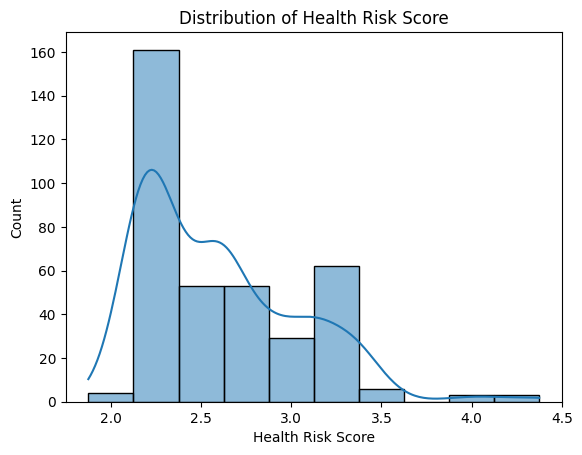

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ds['Health Risk Score'], bins=10, kde=True)
plt.title('Distribution of Health Risk Score')
plt.show()


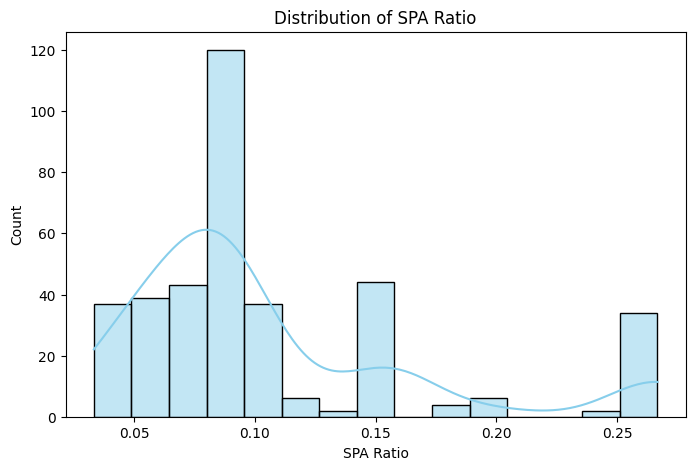

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate SPA Ratio
ds['SPA Ratio'] = ds['Stress Level'] / ds['Physical Activity Level']

# Plot the distribution of SPA Ratio
plt.figure(figsize=(8,5))
sns.histplot(ds['SPA Ratio'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of SPA Ratio")
plt.xlabel("SPA Ratio")
plt.ylabel("Count")
plt.show()


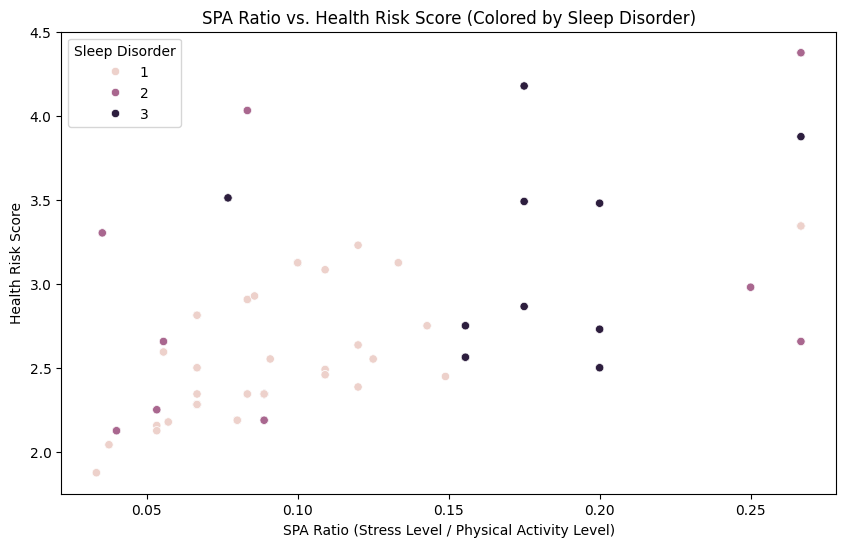

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ds' DataFrame is already loaded and processed with 'SPA Ratio' and 'Health Risk Score' columns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SPA Ratio', y='Health Risk Score', hue='Sleep Disorder', data=ds)
plt.title('SPA Ratio vs. Health Risk Score (Colored by Sleep Disorder)')
plt.xlabel('SPA Ratio (Stress Level / Physical Activity Level)')
plt.ylabel('Health Risk Score')
plt.show()


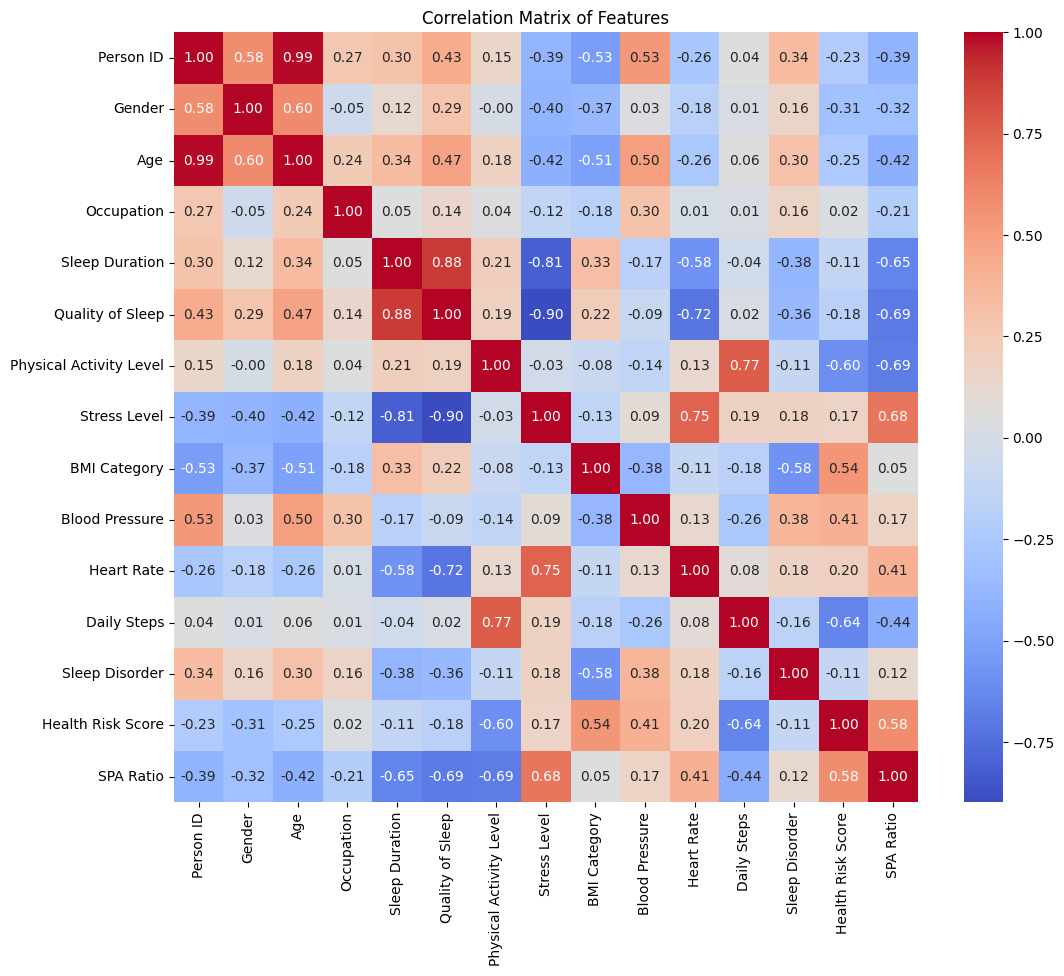

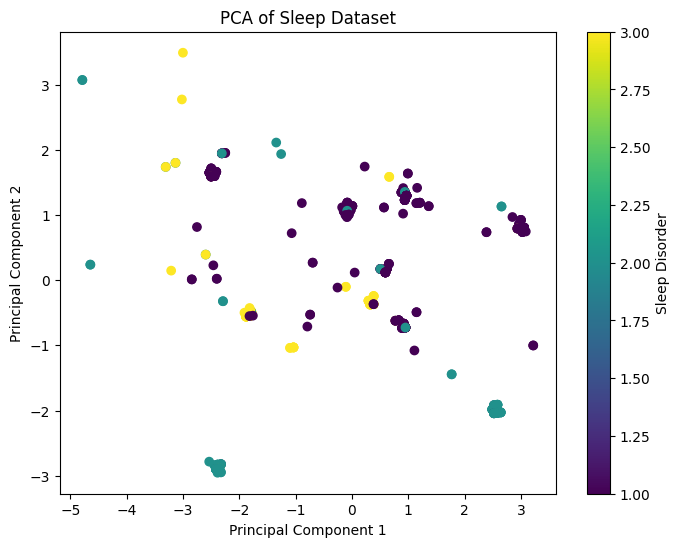

Explained Variance Ratio: [0.40087929 0.21789751]
Total Explained Variance: 0.61877679161407


In [ ]:
# prompt: give heatmap and correlation matrics and pca

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# ... (Your existing code) ...

# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = ds.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# PCA
# Select numerical features for PCA
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                      'Stress Level', 'Heart Rate', 'Daily Steps', 'BMI Category', 'Blood Pressure']  # Include relevant columns
X = ds[numerical_features]

# Standardize the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)  # Reduce to 2 principal components
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=ds['Sleep Disorder'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sleep Dataset')
plt.colorbar(label='Sleep Disorder')
plt.show()

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Total Explained Variance: {np.sum(explained_variance_ratio)}")


In [ ]:
ds['Sleep Quality Index'] = ds['Quality of Sleep'] * ds['Sleep Duration']
ds['Health Risk Score'] = (ds['BMI Category'] + ds['Heart Rate']) / (ds['Physical Activity Level'] + 1)
ds['Stress-Related Insomnia Index'] = ds['Stress Level'] / (ds['Sleep Duration'] + 1e-5)  # Avoid division by zero


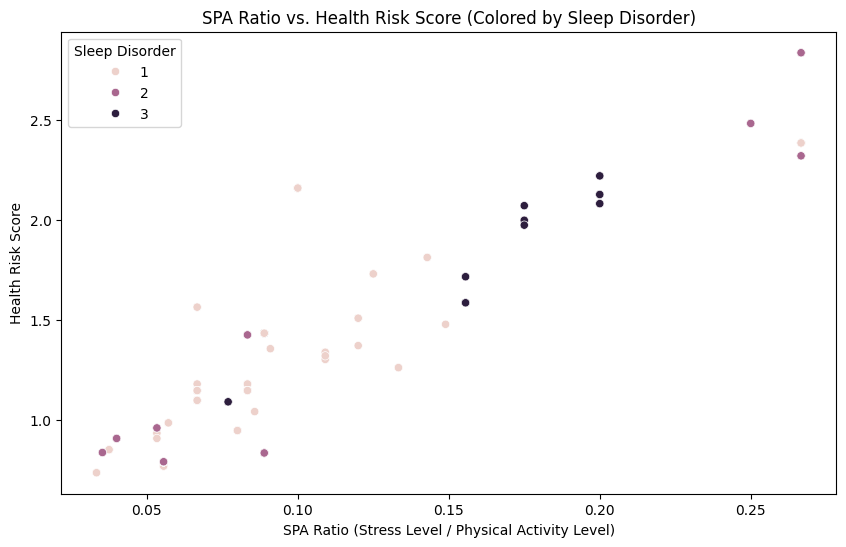

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SPA Ratio', y='Health Risk Score', hue='Sleep Disorder', data=ds)
plt.title('SPA Ratio vs. Health Risk Score (Colored by Sleep Disorder)')
plt.xlabel('SPA Ratio (Stress Level / Physical Activity Level)')
plt.ylabel('Health Risk Score')
plt.show()

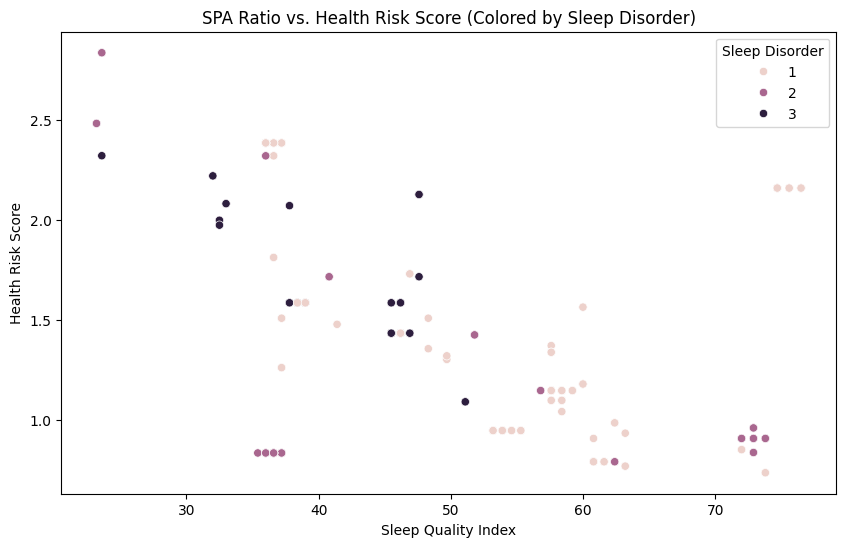

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Quality Index', y='Health Risk Score', hue='Sleep Disorder', data=ds)
plt.title('SPA Ratio vs. Health Risk Score (Colored by Sleep Disorder)')
plt.xlabel('Sleep Quality Index')
plt.ylabel('Health Risk Score')
plt.show()

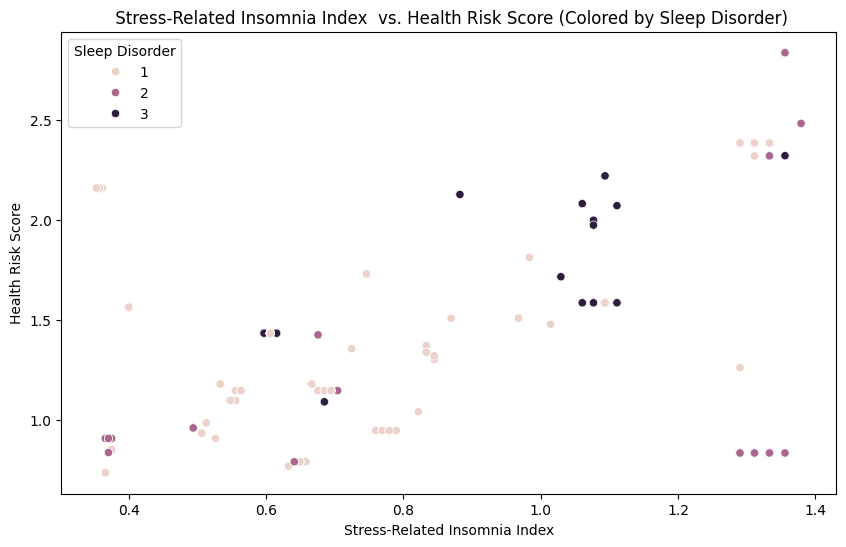

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress-Related Insomnia Index', y='Health Risk Score', hue='Sleep Disorder', data=ds)
plt.title(' Stress-Related Insomnia Index  vs. Health Risk Score (Colored by Sleep Disorder)')
plt.xlabel('Stress-Related Insomnia Index')
plt.ylabel('Health Risk Score')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Load dataset


# Encoding Maps (from original encoding)
encoding_maps = {
    'Gender': {'Male': 1, 'Female': 2},
    'Occupation': {occ: i+1 for i, occ in enumerate(ds['Occupation'].unique())},
    'BMI Category': {bmi: i+1 for i, bmi in enumerate(ds['BMI Category'].unique())},
    'Sleep Disorder': {disorder: i+1 for i, disorder in enumerate(ds['Sleep Disorder'].unique())}
}

# Define function for Blood Pressure categorization
def categorize_bp(bp):
    try:
        systolic, diastolic = map(int, bp.split('/'))
        if systolic <= 90 and diastolic <= 60:
            return 'Low'
        elif systolic <= 120 and diastolic <= 80:
            return 'Normal'
        else:
            return 'High'
    except:
        return 'Unknown'  # Handle missing or invalid data

# Apply Blood Pressure categorization
ds['Blood Pressure'] = ds['Blood Pressure'].apply(categorize_bp)

# Encoding Blood Pressure
bp_encoding = {'Low': 1, 'Normal': 2, 'High': 3}
ds['Blood Pressure'] = ds['Blood Pressure'].map(bp_encoding)

# Generate Synthetic Data
num_samples = 50  # Define how many synthetic samples to generate

synthetic_males = {
    'Gender': [1] * num_samples,  # Encoded as Male (1)
    'Age': np.random.randint(50, 70, num_samples),
    'Sleep Duration': np.random.normal(ds[ds['Age'] >= 50]['Sleep Duration'].mean(), 0.5, num_samples),
    'Quality of Sleep': np.random.choice(ds['Quality of Sleep'].unique(), num_samples),
    'Physical Activity Level': np.random.randint(10, 40, num_samples),
    'Stress Level': np.random.randint(4, 8, num_samples),
    'BMI Category': np.random.choice(ds['BMI Category'].map(encoding_maps['BMI Category']).unique(), num_samples),
    'Blood Pressure': np.random.choice(ds['Blood Pressure'].map(bp_encoding).unique(), num_samples),
    'Heart Rate': np.random.normal(ds[ds['Age'] >= 50]['Heart Rate'].mean(), 5, num_samples),
    'Daily Steps': np.random.randint(1000, 5000, num_samples),
    'Sleep Disorder': np.random.choice(ds['Sleep Disorder'].map(encoding_maps['Sleep Disorder']).unique(), num_samples)
}

# Convert synthetic data to DataFrame
synthetic_df = pd.DataFrame(synthetic_males)
copied_ds=ds.copy()
# Concatenate with original dataset
copied_ds = pd.concat([copied_ds, synthetic_df], ignore_index=True)

# Save new dataset
copied_ds.to_csv("enhanced_dataset.csv", index=False)

print("New dataset size:", copied_ds.shape)
print(copied_ds.head())


New dataset size: (424, 17)
   Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0        1.0       1   27         1.0             6.1                 6   
1        2.0       1   28         2.0             6.2                 6   
2        3.0       1   28         2.0             6.2                 6   
3        4.0       1   28         3.0             5.9                 4   
4        5.0       1   28         3.0             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             1             NaN   
1                       60             8             2             NaN   
2                       60             8             2             NaN   
3                       30             8             3             NaN   
4                       30             8             3             NaN   

   Heart Rate  Daily Steps  Sleep Disorder  Health Risk Score  SPA Ratio  \


In [ ]:
ds['Sleep Quality Index'] = ds['Quality of Sleep'] * ds['Sleep Duration']
ds['Health Risk Score'] = (ds['BMI Category'] + ds['Heart Rate']) / (ds['Physical Activity Level'] + 1)
ds['Stress-Related Insomnia Index'] = ds['Stress Level'] / (ds['Sleep Duration'] + 1e-5)  # Avoid division by zero


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person ID                      374 non-null    int64  
 1   Gender                         374 non-null    int64  
 2   Age                            374 non-null    int64  
 3   Occupation                     374 non-null    int64  
 4   Sleep Duration                 374 non-null    float64
 5   Quality of Sleep               374 non-null    int64  
 6   Physical Activity Level        374 non-null    int64  
 7   Stress Level                   374 non-null    int64  
 8   BMI Category                   374 non-null    int64  
 9   Blood Pressure                 0 non-null      float64
 10  Heart Rate                     374 non-null    float64
 11  Daily Steps                    374 non-null    int64  
 12  Sleep Disorder                 374 non-null    int

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample


# Add new features
ds['Sleep Quality Index'] = ds['Quality of Sleep'] * ds['Sleep Duration']
ds['Health Risk Score'] = (ds['BMI Category'] + ds['Heart Rate']) / (ds['Physical Activity Level'] + 1)
ds['Stress-Related Insomnia Index'] = ds['Stress Level'] / (ds['Sleep Duration'] + 1e-5)

# Separate classes
df_1 = ds[ds['Sleep Disorder'] == 1]
df_2 = ds[ds['Sleep Disorder'] == 2]
df_3 = ds[ds['Sleep Disorder'] == 3]

# Balance the classes by upsampling
max_count = max(len(df_1), len(df_2), len(df_3))
df_1_up = resample(df_1, replace=True, n_samples=max_count, random_state=42)
df_2_up = resample(df_2, replace=True, n_samples=max_count, random_state=42)
df_3_up = resample(df_3, replace=True, n_samples=max_count, random_state=42)

# Combine and shuffle
balanced_ds = pd.concat([df_1_up, df_2_up, df_3_up]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
balanced_ds.to_csv("sleep_dataset_balanced_with_new_features.csv", index=False)

# Print class distribution
print(balanced_ds['Sleep Disorder'].value_counts())


Sleep Disorder
3    219
2    219
1    219
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
ds_balanced['Sleep Quality Index'] = ds_balanced['Quality of Sleep'] * ds_balanced['Sleep Duration']
ds_balanced['Health Risk Score'] = (ds_balanced['BMI Category'] + ds_balanced['Heart Rate']) / (ds_balanced['Physical Activity Level'] + 1)
ds_balanced['Stress-Related Insomnia Index'] = ds_balanced['Stress Level'] / (ds_balanced['Sleep Duration'] + 1e-5)


In [ ]:
# prompt: print the BMI mapping what is mapped to which

# Assuming 'ds' is your DataFrame and 'encoding_maps' is defined as in your code.

for col, mapping in encoding_maps.items():
  print(f"Mapping for column '{col}':")
  for original_value, encoded_value in mapping.items():
    print(f"  '{original_value}' -> {encoded_value}")

print(f"Mapping for column 'Blood Pressure':")
for original_value, encoded_value in bp_encoding.items():
    print(f"  '{original_value}' -> {encoded_value}")


Mapping for column 'Gender':
  'Male' -> 1
  'Female' -> 2
Mapping for column 'Occupation':
  '1' -> 1
  '2' -> 2
  '3' -> 3
  '4' -> 4
  '5' -> 5
  '6' -> 6
  '7' -> 7
  '8' -> 8
  '9' -> 9
  '10' -> 10
  '11' -> 11
Mapping for column 'BMI Category':
  '1' -> 1
  '2' -> 2
  '3' -> 3
Mapping for column 'Sleep Disorder':
  '1' -> 1
  '2' -> 2
  '3' -> 3
Mapping for column 'Blood Pressure':
  'Low' -> 1
  'Normal' -> 2
  'High' -> 3


In [ ]:
# prompt:  print distinct values of bmi

print(ds['BMI Category'].unique())


[1 2 3]


In [ ]:
ds_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person ID                      657 non-null    int64  
 1   Gender                         657 non-null    int64  
 2   Age                            657 non-null    int64  
 3   Occupation                     657 non-null    int64  
 4   Sleep Duration                 657 non-null    float64
 5   Quality of Sleep               657 non-null    int64  
 6   Physical Activity Level        657 non-null    int64  
 7   Stress Level                   657 non-null    int64  
 8   BMI Category                   657 non-null    int64  
 9   Blood Pressure                 657 non-null    int64  
 10  Heart Rate                     657 non-null    float64
 11  Daily Steps                    657 non-null    int64  
 12  Sleep Disorder                 657 non-null    int

In [ ]:
# prompt: ds_balanced.head()

ds_balanced.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Quality Index,Health Risk Score,Stress-Related Insomnia Index
0,267,1,48,2,7.3,7,65,5,3,3,69.018265,3500,3,51.1,1.091186,0.684931
1,288,2,50,5,6.0,6,90,8,1,3,75.000000,10000,2,36.0,0.835165,1.333331
2,368,2,59,5,8.0,9,75,3,1,3,68.000000,7000,2,72.0,0.907895,0.375000
3,75,1,33,2,6.0,6,30,8,2,3,72.000000,5000,1,36.0,2.387097,1.333331
4,361,2,59,5,8.2,9,75,3,1,3,68.000000,7000,2,73.8,0.907895,0.365853


In [ ]:
# Columns that need scaling
scaling_cols = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
                'Heart Rate', 'Daily Steps', 'Health Risk Score', 'SPA Ratio',
                'Sleep Quality Index', 'Stress-Related Insomnia Index']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
ds[scaling_cols] = scaler.fit_transform(ds[scaling_cols])

# Check if scaling worked
print(ds[scaling_cols].describe())


       Sleep Duration  Quality of Sleep  Physical Activity Level  \
count    3.740000e+02      3.740000e+02             3.740000e+02   
mean     1.348891e-15      2.469801e-16            -3.324732e-17   
std      1.001340e+00      1.001340e+00             1.001340e+00   
min     -1.676439e+00     -2.771424e+00            -1.402260e+00   
25%     -9.213348e-01     -1.098280e+00            -6.812078e-01   
50%      8.547080e-02     -2.617083e-01             3.984423e-02   
75%      8.405750e-01      5.748635e-01             7.608963e-01   
max      1.721530e+00      1.411435e+00             1.481948e+00   

       Stress Level    Heart Rate   Daily Steps  Health Risk Score  \
count  3.740000e+02  3.740000e+02  3.740000e+02       3.740000e+02   
mean   1.994839e-16 -3.609709e-16 -9.499234e-17       6.649464e-17   
std    1.001340e+00  1.001340e+00  1.001340e+00       1.001340e+00   
min   -1.345836e+00 -1.314542e+00 -2.362273e+00      -1.172908e+00   
25%   -7.815505e-01 -5.190494e-01 -7.

Random Forest Accuracy: 0.9545454545454546

Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        44
           2       0.98      0.91      0.94        44
           3       0.95      0.95      0.95        44

    accuracy                           0.95       132
   macro avg       0.96      0.95      0.95       132
weighted avg       0.96      0.95      0.95       132


Confusion Matrix:
 [[44  0  0]
 [ 2 40  2]
 [ 1  1 42]]


<ipython-input-233-f5e7968d6b34>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance['Importance'], y=rf_importance['Feature'], palette="crest")


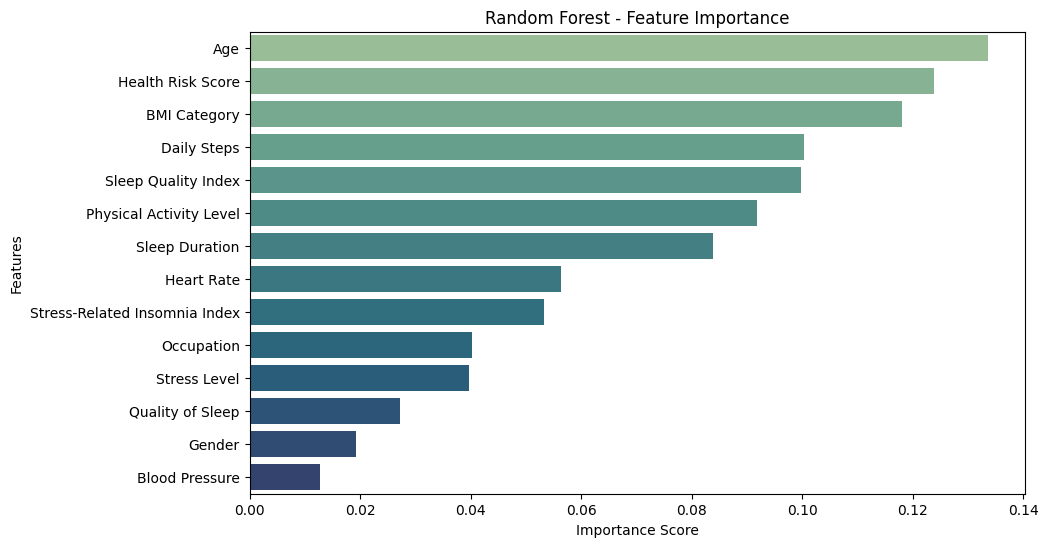

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Feature Importance
rf_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importance['Importance'], y=rf_importance['Feature'], palette="crest")
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()